In [185]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

In [186]:
data = pd.read_csv('datasets/heart.csv')

In [187]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [188]:
data = data.rename(columns={
    'ST slope':'st_slope',
    'max heart rate' : 'max_heart_rate',
    'exercise angina' : 'exercise_angina',
    'fasting blood sugar': 'fasting_blood_sugar',
    'resting bp s': 'resting_bp_s',
    'chest pain type': 'chest_pain_type'    
})

In [189]:
data

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [191]:
data.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [192]:
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>],
       [<Axes: title={'center': 'resting_bp_s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max_heart_rate'}>,
        <Axes: title={'center': 'exercise_angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

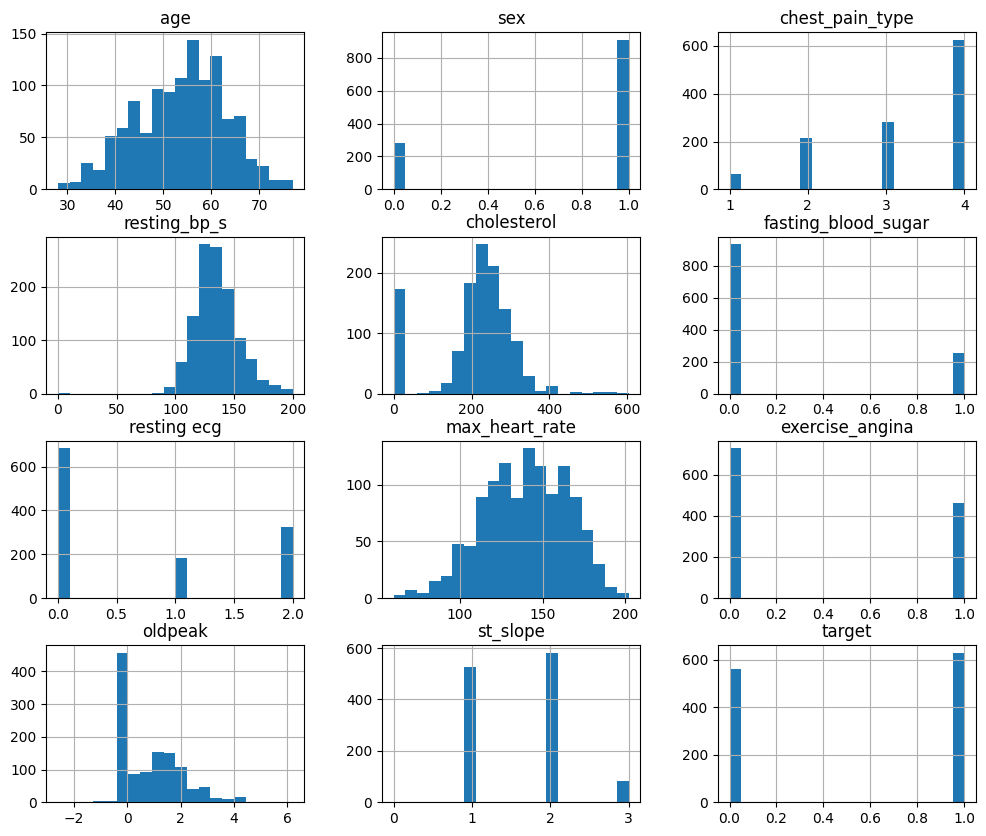

In [193]:
data.hist(bins=20, figsize=(12,10))

<Axes: xlabel='cholesterol', ylabel='age'>

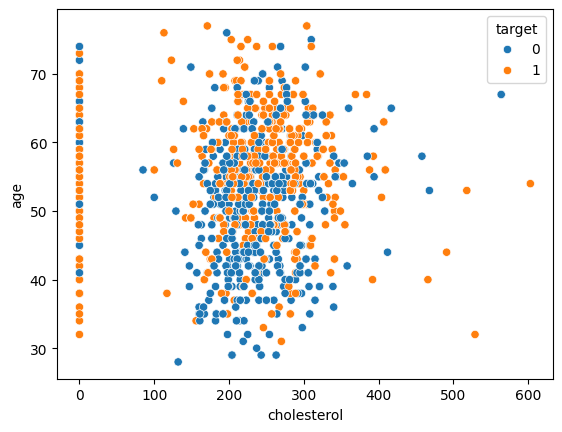

In [194]:
sns.scatterplot(x='cholesterol' , y = 'age',data= data, hue = 'target')

<Axes: >

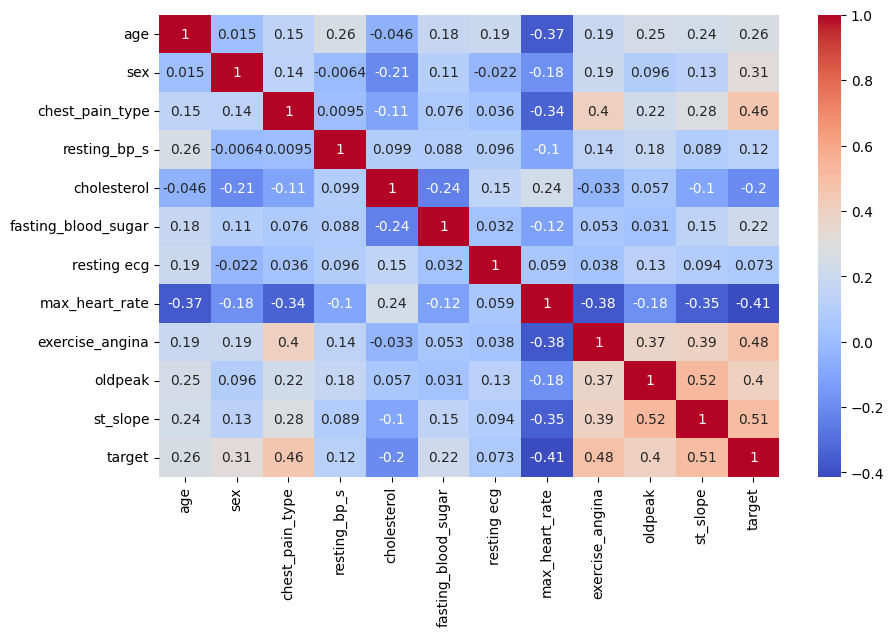

In [195]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


In [196]:
X = data.drop(columns='target')
y = data['target']

In [197]:

cat_features = ["sex", "chest_pain_type", "fasting_blood_sugar", 
                "resting ecg", "exercise_angina", "st_slope"]
num_features = X.drop(columns=cat_features).columns.tolist()


In [198]:
num_transformer = Pipeline([
    ('scaler' , StandardScaler())
])
cat_transformer = Pipeline([
    ('encoder' , OneHotEncoder(handle_unknown='ignore'))
])

preprocessor  =  ColumnTransformer([
    ('num', num_transformer, num_features ),
    ('cat' , cat_transformer, cat_features)
])

In [199]:
log_model = Pipeline([
    ('preprocessor' , preprocessor),
    ('lin', LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [201]:
print(y_pred[:10])
print(y_test.to_numpy()[:10])

[1 1 0 1 1 1 0 0 0 0]
[1 1 0 1 1 1 0 0 0 0]


In [202]:
acc = accuracy_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8739495798319328
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.87      0.91      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238


In [203]:
def plot_correlations(data, target_col="target", top_n=5):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,6))
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))  
    sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask)
    plt.title("Correlation Heatmap")
    plt.show()
    
    corr_target = data.corr()[target_col].sort_values(ascending=False)
    print("\n🔎 Корреляция с целевой переменной (target):")
    print(corr_target.head(top_n+1))  


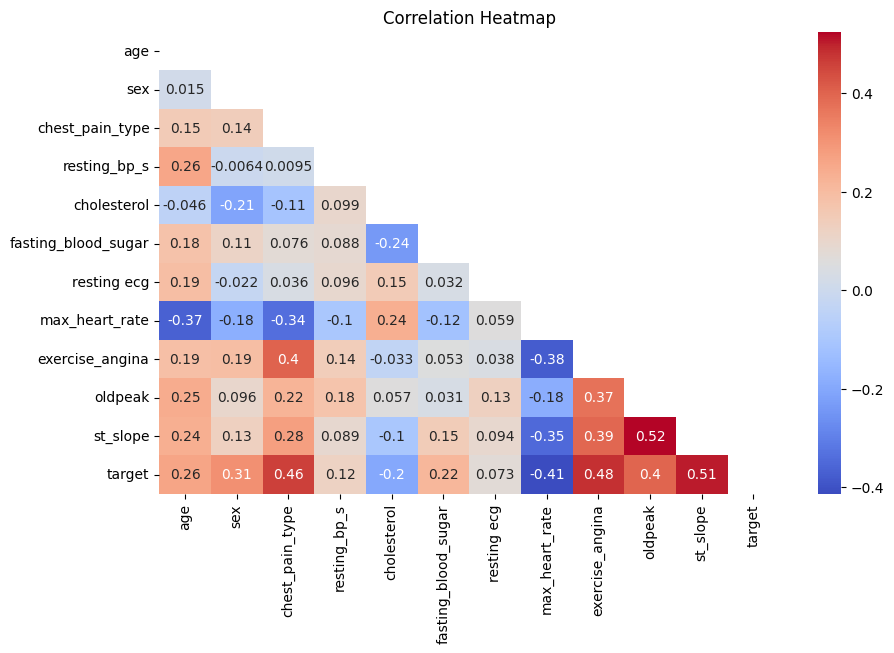


🔎 Корреляция с целевой переменной (target):
target             1.000000
st_slope           0.505608
exercise_angina    0.481467
chest_pain_type    0.460127
oldpeak            0.398385
sex                0.311267
Name: target, dtype: float64


In [204]:
plot_correlations(data, target_col="target", top_n=5)


In [206]:
rf_model = Pipeline([
    ('preprocessor' , preprocessor),
    ('rf' , RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train, y_train)
rf_predictions  = rf_model.predict(X_test)


In [215]:
print(rf_predictions[:10])
print(y_test.to_numpy()[:10])
print(classification_report(y_test,rf_predictions))


[1 1 0 1 1 1 0 0 0 0]
[1 1 0 1 1 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238
